In [1]:
import pandas as pd

import random
import os
# import torch.random
import numpy as np
import seaborn as sns
from model import TimeSeriesDetector
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import warnings
from plotting import plot_detection
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

/Users/anastasiazasypkina/Documents/GitHub/turbohack/task_1/model.py:233: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def predict_batch(self, ts: pd.Series, ts_batch: pd.Series = pd.Series()):


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def seed_everything(seed=7575):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)

#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.backends.cudnn.deterministic = True
#     torch.random.manual_seed(seed)

seed_everything()

In [4]:
train = pd.read_excel("./data/Задача 1. Датасет 1. Тренировочный неразмеченный.xlsx", index_col='Параметр')
test = pd.read_excel("./data/Задача 1. Датасет 1. Тренировочный размеченный.xlsx", index_col='Параметр')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

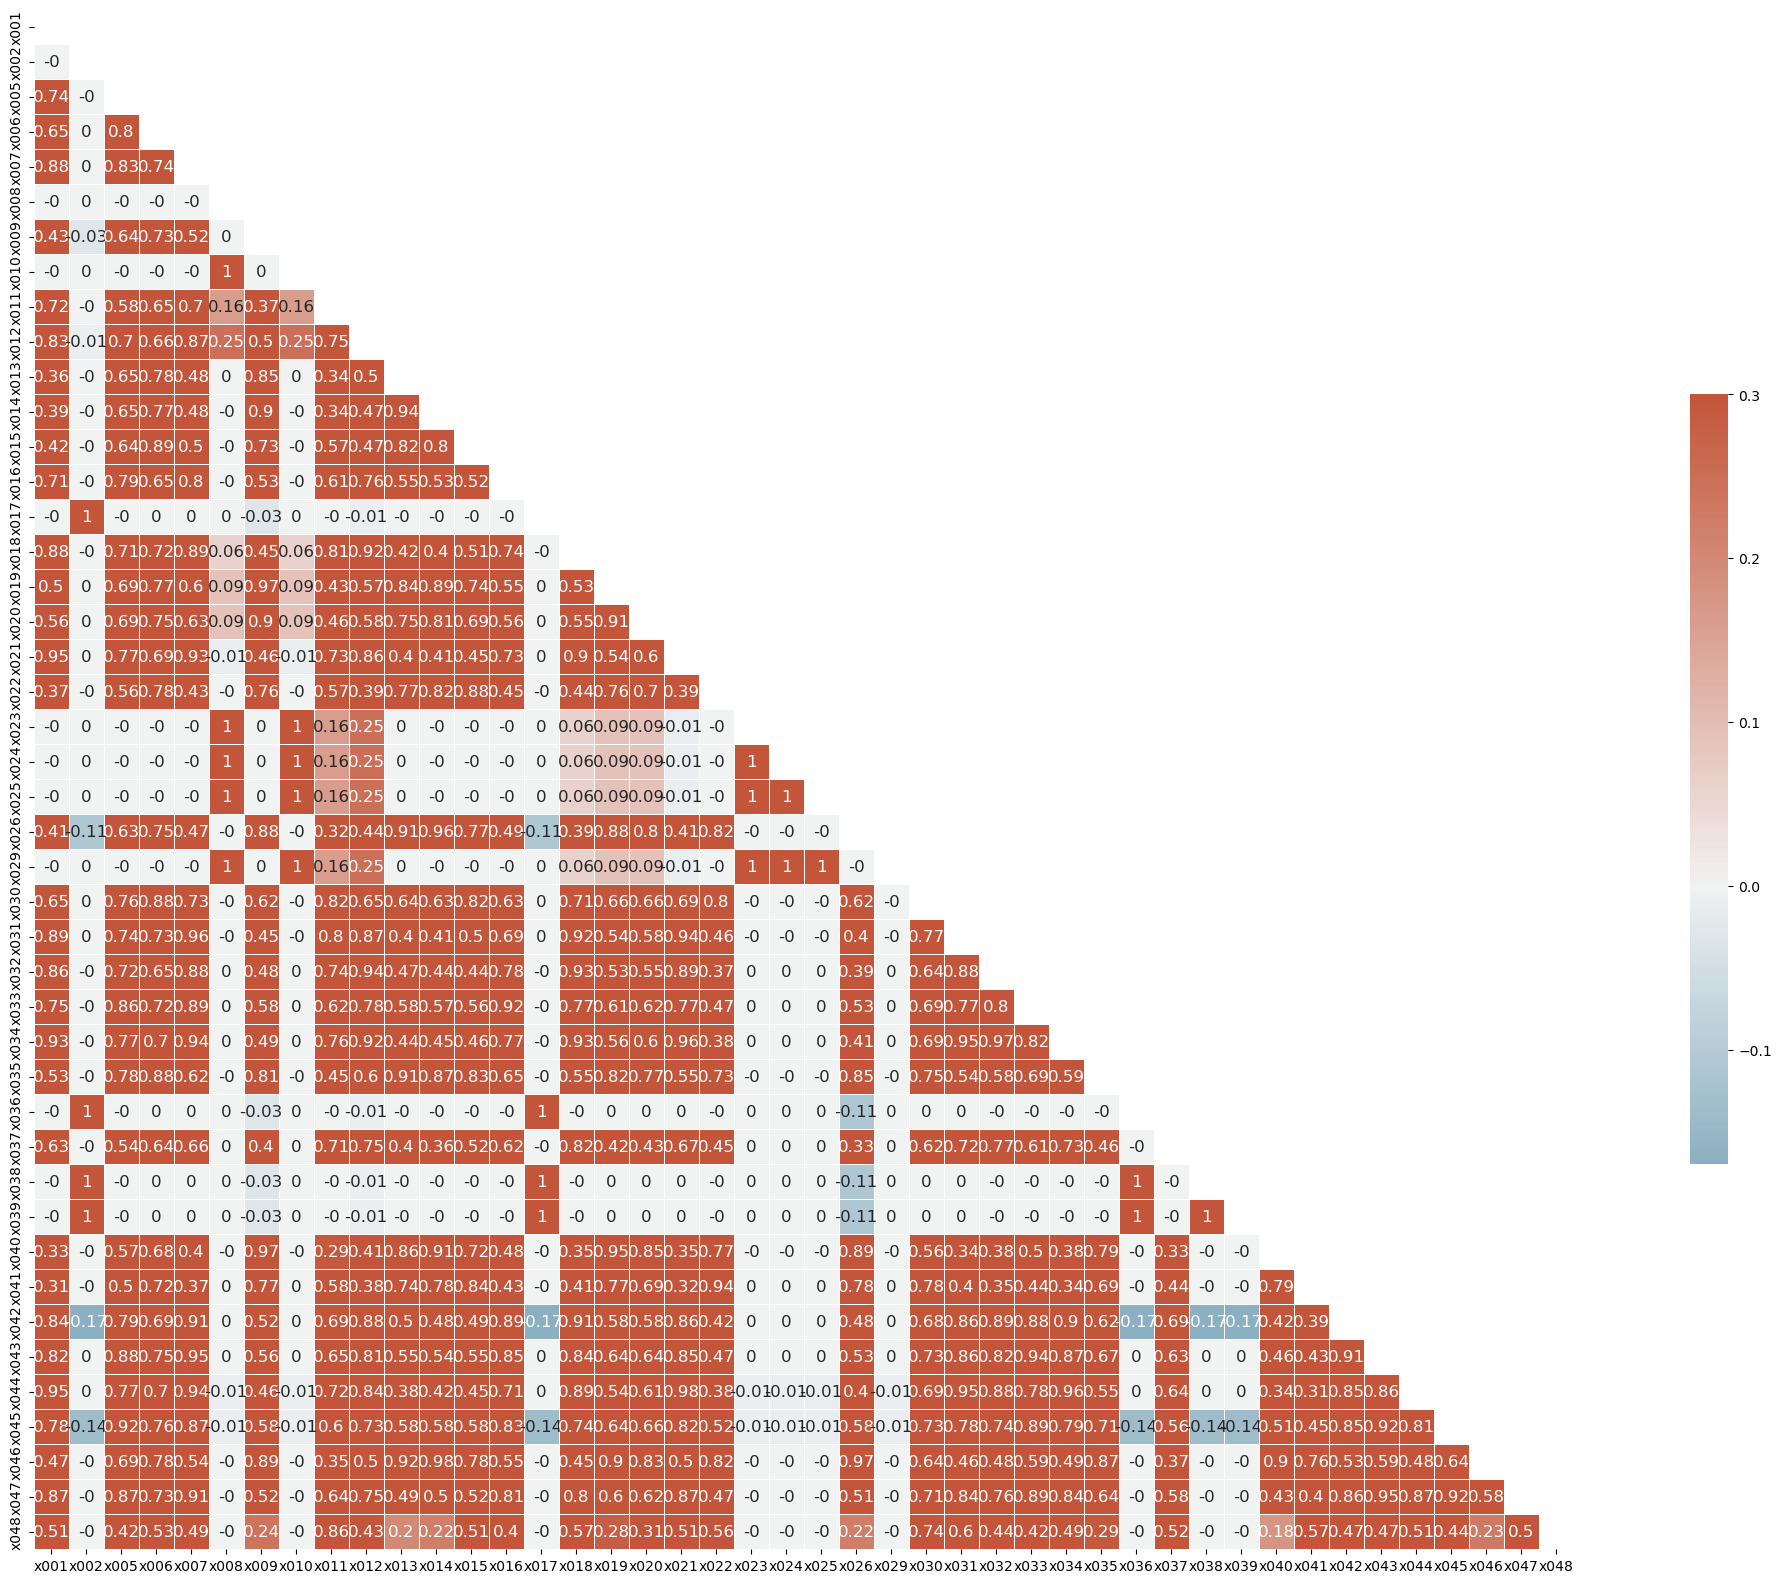

In [6]:
plt.figure(figsize=(30,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train.corr(), dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train.corr().round(2), 
            mask=mask, cmap=cmap, vmax=.3, 
            center=0, annot=True, annot_kws = {'size': 12},
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, )

<AxesSubplot: >

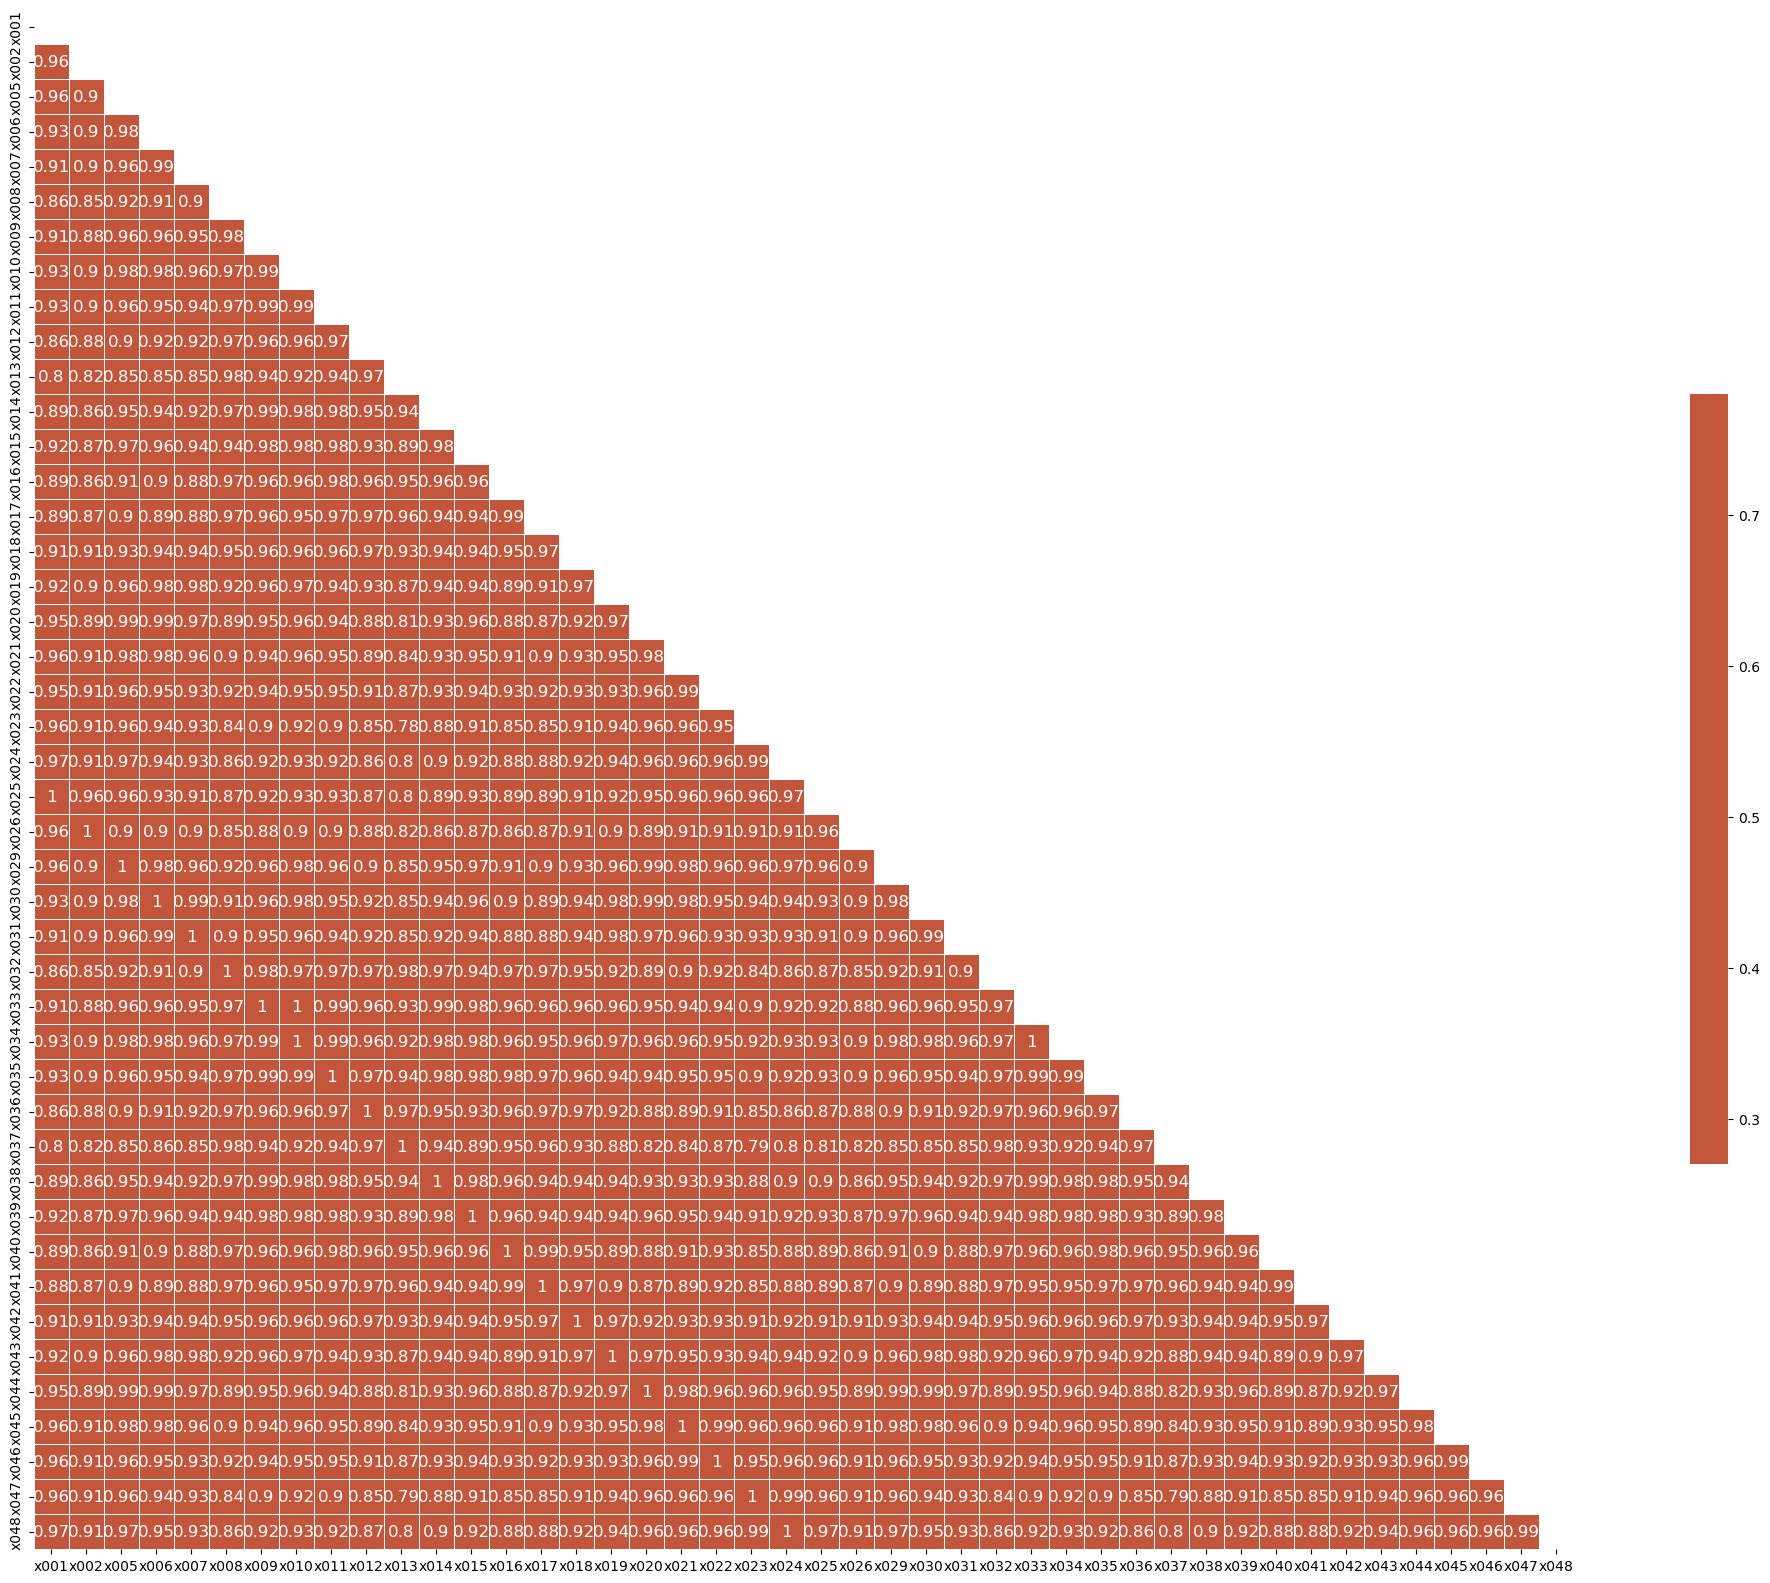

In [7]:
plt.figure(figsize=(30,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(test.corr(), dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(test.corr().round(2), 
            mask=mask, cmap=cmap, vmax=.3, 
            center=0, annot=True, annot_kws = {'size': 12},
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, )

In [8]:
from sklearn.metrics import r2_score

In [9]:
list_outliers = []
tmp = train.copy()


for i in range(10):
    df = tmp.corr()
    df['sum'] = df.sum(axis=1)
    df = df.sort_values('sum')
#     print(df)
    
    target = df['sum'].index[0]
#     print(target)
#     tmp = train_.copy()

    scaler = StandardScaler()
    tmp_sc = scaler.fit_transform(tmp)
    tmp_sc_pd = pd.DataFrame(data=tmp_sc, columns=tmp.columns.tolist(), index = tmp.index)
    
    X_train, y_train = tmp_sc_pd.drop(f'{target}', axis=1), tmp_sc_pd[[f'{target}']]
    
    model = Lasso(alpha=1)
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
#     print(r2_score(pred, target))
    
    y_train[f'pred_{target}'] = pred
    y_train[f'diff_{target}'] = abs(y_train[f'{target}'] - y_train[f'pred_{target}'])
    
    y_train = y_train.sort_values(f'diff_{target}')
    mean_y, std_y = y_train[f'diff_{target}'].mean(), y_train[f'diff_{target}'].std()
    
    outlier = y_train[y_train[f'diff_{target}'] > mean_y + 3*std_y].index.tolist()
    
    for out in outlier:
        if out not in list_outliers:
            list_outliers.append(out)
    
    
    c = set(list_outliers) - set(outlier)
    
#     list_outliers.append(*outlier)
#     list_outliers = list(set(list_outliers))
    
#     row_drop = []
#     for out in outlier:
#         if out not in list_outliers:
#             row_drop.append(out)
    
    
    tmp = tmp.drop(outlier)    

In [10]:
tmp

х001    х002    х005    х006    х007    х008    х009  \
Параметр                                                                      
2021-03-24 13:50:00  577.64  566.55  590.45  576.19  573.11  571.31  590.91   
2021-03-24 14:00:00  586.00  572.80  599.18  585.74  580.65  578.99  596.22   
2021-03-24 14:10:00  588.59  573.98  600.51  590.21  583.39  582.58  594.09   
2021-03-24 14:20:00  587.23  571.40  598.82  587.36  580.06  580.23  594.21   
2021-03-24 14:30:00  583.90  568.71  595.37  588.07  578.18  579.13  593.18   
...                     ...     ...     ...     ...     ...     ...     ...   
2022-03-22 04:20:00  555.43  560.10  557.04  548.81  548.94  580.45  582.69   
2022-03-22 04:30:00  555.73  560.57  557.38  549.22  548.94  580.79  582.94   
2022-03-22 04:40:00  556.68  561.24  558.31  550.17  550.21  581.46  583.78   
2022-03-22 04:50:00  557.01  561.60  558.69  550.39  550.55  582.10  584.34   
2022-03-22 05:00:00  556.92  561.63  558.43  550.30  550.45  582.01  584.46   

                       х010    х011    х012  ...    х039    х040    х041  \
Параметр                                     ...                           
2021-03-24 13:50:00  589.67  579.19  569.13  ...  577.83  560.46  556.89   
2021-03-24 14:00:00  597.53  585.06  574.26  ...  591.73  569.11  565.92   
2021-03-24 14:10:00  594.99  586.70  571.53  ...  597.62  573.98  569.60   
2021-03-24 14:20:00  597.14  585.66  568.78  ...  597.69  572.62  567.39   
2021-03-24 14:30:00  594.86  587.65  567.75  ...  596.46  573.28  567.04   
...                     ...     ...     ...  ...     ...     ...     ...   
2022-03-22 04:20:00  578.78  577.81  579.95  ...  570.41  575.21  572.80   
2022-03-22 04:30:00  579.22  577.80  579.90  ...  570.91  575.23  572.74   
2022-03-22 04:40:00  580.09  578.74  580.90  ...  571.56  576.18  574.24   
2022-03-22 04:50:00  580.38  579.36  580.90  ...  572.15  576.67  574.47   
2022-03-22 05:00:00  580.55  579.20  580.97  ...  572.05  577.10  574.29   

                       х042    х043    х044    х045    х046    х047    х048  
Параметр                                                                     
2021-03-24 13:50:00  555.97  585.74  581.30  561.09  560.34  577.21  577.46  
2021-03-24 14:00:00  564.06  589.19  591.20  569.13  568.94  581.37  585.81  
2021-03-24 14:10:00  567.60  584.83  595.38  572.04  571.79  583.09  588.49  
2021-03-24 14:20:00  565.40  579.10  594.22  570.47  569.53  581.08  586.16  
2021-03-24 14:30:00  564.99  570.92  595.42  569.74  569.16  580.91  584.33  
...                     ...     ...     ...     ...     ...     ...     ...  
2022-03-22 04:20:00  566.38  556.54  548.89  548.70  559.06  554.61  554.63  
2022-03-22 04:30:00  566.63  556.50  548.96  548.78  559.15  554.48  554.70  
2022-03-22 04:40:00  567.80  557.73  550.05  549.69  560.07  555.28  555.60  
2022-03-22 04:50:00  567.83  558.11  550.28  550.63  560.60  555.85  556.77  
2022-03-22 05:00:00  568.13  558.23  550.56  550.33  560.54  555.75  555.73  

[37119 rows x 44 columns]

In [11]:
len(list_outliers), len(set(list_outliers))

(220, 220)

<AxesSubplot: >

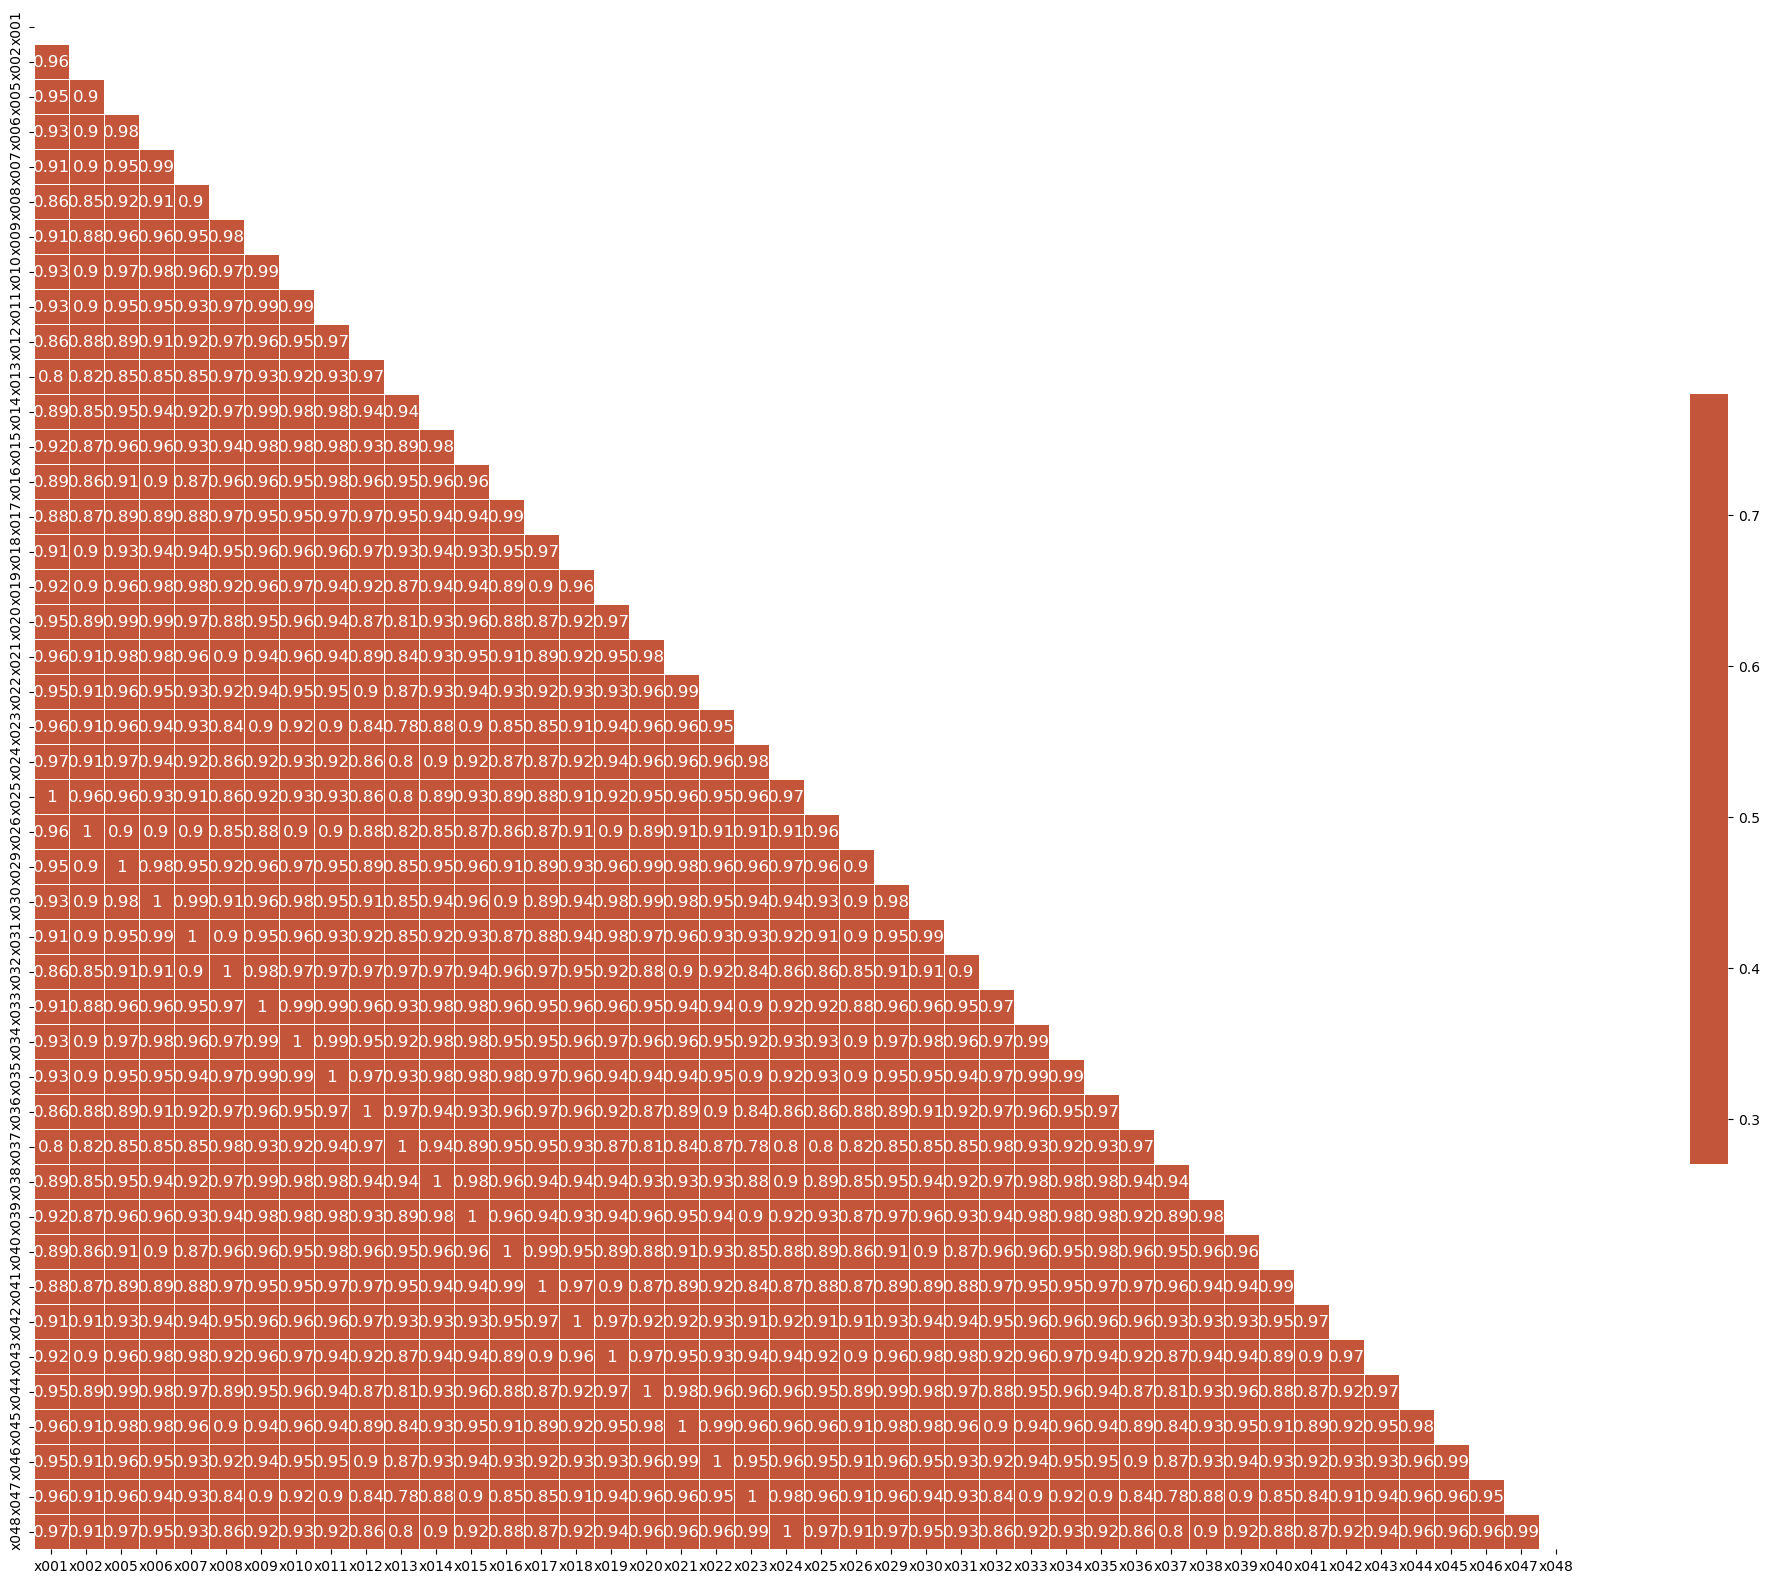

In [12]:
plt.figure(figsize=(30,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(tmp.corr(), dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(tmp.corr().round(2), 
            mask=mask, cmap=cmap, vmax=.3, 
            center=0, annot=True, annot_kws = {'size': 12},
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, )

In [13]:
df = tmp.corr()
df['sum'] = df.sum(axis=1)
df = df.sort_values('sum')
df

х001      х002      х005      х006      х007      х008      х009  \
х013  0.797438  0.819395  0.847980  0.850800  0.850898  0.974764  0.932545   
х037  0.798908  0.820519  0.849386  0.852087  0.852017  0.975168  0.933349   
х002  0.959793  1.000000  0.895719  0.896618  0.900877  0.851315  0.881244   
х026  0.959594  0.999715  0.895567  0.896570  0.900922  0.851726  0.881408   
х023  0.956606  0.905766  0.955578  0.942395  0.931060  0.837965  0.897971   
х047  0.956400  0.906075  0.955253  0.942090  0.930902  0.838297  0.897842   
х001  1.000000  0.959793  0.953724  0.928515  0.907044  0.861474  0.913036   
х025  0.999776  0.960358  0.956082  0.932551  0.911797  0.863715  0.915759   
х041  0.881355  0.870458  0.892150  0.887152  0.876219  0.968314  0.953514   
х024  0.971578  0.910010  0.966503  0.944011  0.924077  0.861569  0.916829   
х048  0.971729  0.910884  0.967283  0.945792  0.926315  0.862570  0.918101   
х036  0.858673  0.880855  0.888830  0.910205  0.916001  0.969676  0.956276   
х017  0.883159  0.872276  0.894121  0.889567  0.878851  0.968652  0.954714   
х012  0.859561  0.882034  0.890330  0.912739  0.919088  0.969013  0.956912   
х016  0.888960  0.861755  0.906968  0.896771  0.873244  0.963998  0.961425   
х040  0.889551  0.862505  0.907592  0.897711  0.874390  0.964220  0.961976   
х032  0.860929  0.851067  0.914828  0.910328  0.901380  0.999802  0.975151   
х008  0.861474  0.851315  0.915339  0.910644  0.901571  1.000000  0.975118   
х007  0.907044  0.900877  0.954225  0.988517  1.000000  0.901571  0.945592   
х031  0.907483  0.901129  0.954516  0.988623  0.999958  0.901734  0.945779   
х020  0.949418  0.891368  0.985023  0.985189  0.967594  0.884789  0.946207   
х044  0.949717  0.891366  0.985153  0.984902  0.967022  0.885172  0.946409   
х022  0.952716  0.905568  0.960187  0.949020  0.930111  0.916104  0.935599   
х046  0.953086  0.906098  0.959982  0.948803  0.929968  0.916116  0.935550   
х014  0.892059  0.854398  0.949762  0.940111  0.918321  0.968657  0.985588   
х038  0.892327  0.854343  0.950375  0.940648  0.918825  0.968420  0.985619   
х021  0.955312  0.906172  0.976528  0.975469  0.958591  0.896092  0.939610   
х043  0.916489  0.899916  0.962291  0.977206  0.980752  0.917994  0.958574   
х045  0.955337  0.906488  0.976579  0.975733  0.958999  0.895954  0.939630   
х019  0.916934  0.899652  0.962872  0.977421  0.980646  0.918171  0.958940   
х018  0.906341  0.904956  0.928632  0.937895  0.939568  0.952862  0.960606   
х042  0.907109  0.906056  0.929755  0.940167  0.942342  0.951462  0.960800   
х030  0.928630  0.896639  0.980102  0.999952  0.988513  0.910081  0.959330   
х006  0.928515  0.896618  0.980118  1.000000  0.988517  0.910644  0.959567   
х039  0.923924  0.869616  0.964989  0.960430  0.934524  0.939690  0.981753   
х015  0.923567  0.869695  0.964899  0.960501  0.934682  0.940399  0.981979   
х029  0.953421  0.895539  0.999926  0.980407  0.954624  0.915150  0.961954   
х005  0.953724  0.895719  1.000000  0.980118  0.954225  0.915339  0.961944   
х009  0.913036  0.881244  0.961944  0.959567  0.945592  0.975118  1.000000   
х033  0.913858  0.882641  0.962753  0.961327  0.947883  0.974100  0.999869   
х011  0.925237  0.899459  0.953422  0.951893  0.934162  0.970297  0.988657   
х035  0.925917  0.900241  0.954147  0.952795  0.935212  0.969975  0.988690   
х010  0.929443  0.901517  0.974731  0.975552  0.963279  0.965910  0.994544   
х034  0.929624  0.901680  0.974720  0.975341  0.963036  0.966197  0.994560   

          х010      х011      х012  ...      х040      х041      х042  \
х013  0.920551  0.934538  0.971417  ...  0.949453  0.954729  0.928173   
х037  0.921524  0.935351  0.971573  ...  0.949969  0.955067  0.928816   
х002  0.901517  0.899459  0.882034  ...  0.862505  0.870458  0.906056   
х026  0.901616  0.899644  0.882685  ...  0.862881  0.871038  0.906521   
х023  0.919729  0.899966  0.843980  ...  0.851331  0.843523  0.907617   
х047  0.919614  0.899964  0.844521  ...  0.851596  0.843959  

In [14]:
real_outliers = list(set(train.index) - set(test.index))

In [15]:
import joblib 


In [17]:
len(real_outliers)

523

In [18]:
list_outliers

[Timestamp('2021-04-30 05:00:00'),
 Timestamp('2021-12-31 05:00:00'),
 Timestamp('2021-12-31 00:30:00'),
 Timestamp('2021-12-31 00:40:00'),
 Timestamp('2021-10-30 10:00:00'),
 Timestamp('2021-10-30 08:10:00'),
 Timestamp('2021-10-30 08:20:00'),
 Timestamp('2021-10-30 08:30:00'),
 Timestamp('2021-10-30 08:40:00'),
 Timestamp('2021-10-30 08:50:00'),
 Timestamp('2021-10-30 09:00:00'),
 Timestamp('2021-10-30 08:00:00'),
 Timestamp('2021-10-30 10:50:00'),
 Timestamp('2021-10-30 10:30:00'),
 Timestamp('2021-10-30 10:20:00'),
 Timestamp('2021-10-30 10:10:00'),
 Timestamp('2021-10-30 09:10:00'),
 Timestamp('2021-10-30 09:50:00'),
 Timestamp('2021-10-30 09:40:00'),
 Timestamp('2021-10-30 10:40:00'),
 Timestamp('2021-10-30 09:30:00'),
 Timestamp('2021-10-30 07:50:00'),
 Timestamp('2021-10-30 07:30:00'),
 Timestamp('2021-10-30 05:10:00'),
 Timestamp('2021-10-30 05:20:00'),
 Timestamp('2021-10-30 05:30:00'),
 Timestamp('2021-10-30 05:40:00'),
 Timestamp('2021-10-30 05:50:00'),
 Timestamp('2021-10-

In [19]:
a = 0
for elem in list_outliers:
    if elem in real_outliers:
        a+=1
a

220

In [20]:
b = list(set(real_outliers) - set(list_outliers))
b

[Timestamp('2022-02-22 07:20:00'),
 Timestamp('2021-09-24 21:40:00'),
 Timestamp('2021-11-18 01:00:00'),
 Timestamp('2022-02-22 04:50:00'),
 Timestamp('2021-06-04 05:30:00'),
 Timestamp('2022-03-16 09:30:00'),
 Timestamp('2021-07-09 20:40:00'),
 Timestamp('2021-12-21 01:40:00'),
 Timestamp('2022-02-01 14:00:00'),
 Timestamp('2022-01-10 03:50:00'),
 Timestamp('2021-11-07 16:00:00'),
 Timestamp('2022-01-18 01:50:00'),
 Timestamp('2021-07-09 23:50:00'),
 Timestamp('2021-07-24 03:00:00'),
 Timestamp('2021-10-05 00:40:00'),
 Timestamp('2021-04-08 11:40:00'),
 Timestamp('2021-09-21 05:40:00'),
 Timestamp('2021-10-24 21:10:00'),
 Timestamp('2022-01-24 12:10:00'),
 Timestamp('2021-07-09 19:00:00'),
 Timestamp('2021-07-09 20:00:00'),
 Timestamp('2021-07-14 22:30:00'),
 Timestamp('2021-12-29 04:50:00'),
 Timestamp('2021-07-09 21:40:00'),
 Timestamp('2021-06-14 11:10:00'),
 Timestamp('2021-07-21 05:00:00'),
 Timestamp('2022-02-01 11:40:00'),
 Timestamp('2021-03-27 14:10:00'),
 Timestamp('2021-12-

In [21]:
period = ['2022-01-18 00:00:00','2022-01-18 00:20:00']

In [22]:
train.loc[period[0]:period[1]].sum(axis=1)

Параметр
2022-01-18 00:00:00    24641.02
2022-01-18 00:10:00    24619.68
2022-01-18 00:20:00    24692.95
dtype: float64

In [23]:
train['sum_feats'] = train.sum(axis=1)
test['sum_feats'] = test.sum(axis=1)

In [24]:
test['not_outlier']=1

In [25]:
df = pd.merge(train.reset_index(), test[["not_outlier"]].reset_index(), 
              suffixes=("_train", "_test"),
              on = 'Параметр', how = 'left')

In [26]:
df = df.set_index("Параметр", drop = True)

In [27]:
del df['sum_feats']

In [28]:
df = df.fillna(0)

In [29]:
def group_outliers(outlier_period:list):
    
    prev_date = outlier_period[0]
    outlier_group_period = [[prev_date]]
    ind_group = 0

    for cur_date_outlier in outlier_period[1:]:
        delta_slide = int((cur_date_outlier-prev_date).seconds/60)

        if delta_slide > 10:
            outlier_group_period[ind_group].append(prev_date)
            ind_group+=1
            outlier_group_period.append([])
            outlier_group_period[ind_group].append(cur_date_outlier)

        prev_date = cur_date_outlier
        
    return outlier_group_period

In [30]:
outlier_period = df.query("not_outlier!=1").index.tolist()

outlier_periods = pd.DataFrame(group_outliers(outlier_period), columns=['begin', 'end'])
outlier_periods['duration'] = (outlier_periods['end'] - outlier_periods['begin']).dt.seconds/60
outlier_periods = outlier_periods.sort_values(by='duration', ascending = False).reset_index(drop=True)

outlier_periods['begin_broad'] = outlier_periods['begin']-pd.Timedelta(hours=5)
outlier_periods['end_broad'] = outlier_periods['end']+pd.Timedelta(hours=5)

In [31]:
outlier_periods

begin                 end  duration         begin_broad  \
0   2021-12-30 05:30:00 2021-12-31 00:40:00    1150.0 2021-12-30 00:30:00   
1   2021-10-30 05:10:00 2021-10-30 15:20:00     610.0 2021-10-30 00:10:00   
2   2021-07-09 18:20:00 2021-07-10 01:20:00     420.0 2021-07-09 13:20:00   
3   2021-03-29 01:10:00 2021-03-29 05:50:00     280.0 2021-03-28 20:10:00   
4   2022-01-18 01:10:00 2022-01-18 04:10:00     180.0 2022-01-17 20:10:00   
..                  ...                 ...       ...                 ...   
212 2021-07-15 21:30:00 2021-07-15 21:30:00       0.0 2021-07-15 16:30:00   
213 2021-07-16 04:40:00 2021-07-16 04:40:00       0.0 2021-07-15 23:40:00   
214 2021-07-18 01:40:00 2021-07-18 01:40:00       0.0 2021-07-17 20:40:00   
215 2022-03-16 09:30:00 2022-03-16 09:30:00       0.0 2022-03-16 04:30:00   
216 2022-03-16 13:10:00                 NaT       NaN 2022-03-16 08:10:00   

              end_broad  
0   2021-12-31 05:40:00  
1   2021-10-30 20:20:00  
2   2021-07-10 06:20:00  
3   2021-03-29 10:50:00  
4   2022-01-18 09:10:00  
..                  ...  
212 2021-07-16 02:30:00  
213 2021-07-16 09:40:00  
214 2021-07-18 06:40:00  
215 2022-03-16 14:30:00  
216                 NaT  

[217 rows x 5 columns]

In [32]:
list_outliers.sort()
determ_outliers = [outlier for outlier in list_outliers if outlier in real_outliers]

determ_periods = pd.DataFrame(group_outliers(determ_outliers), columns=['begin', 'end'])
determ_periods['duration'] = (determ_periods['end'] - determ_periods['begin']).dt.seconds/60
determ_periods = determ_periods.sort_values(by='duration', ascending = False).reset_index(drop=True)

determ_periods['begin_broad'] = determ_periods['begin']-pd.Timedelta(hours=5)
determ_periods['end_broad'] = determ_periods['end']+pd.Timedelta(hours=5)

In [33]:
determ_periods

begin                 end  duration         begin_broad  \
0  2021-12-30 05:30:00 2021-12-31 00:40:00    1150.0 2021-12-30 00:30:00   
1  2021-10-30 05:10:00 2021-10-30 15:20:00     610.0 2021-10-30 00:10:00   
2  2021-03-29 01:10:00 2021-03-29 05:50:00     280.0 2021-03-28 20:10:00   
3  2021-03-24 13:30:00 2021-03-24 13:40:00      10.0 2021-03-24 08:30:00   
4  2021-05-31 10:10:00 2021-05-31 10:20:00      10.0 2021-05-31 05:10:00   
5  2021-04-06 16:40:00 2021-04-06 16:40:00       0.0 2021-04-06 11:40:00   
6  2021-04-30 05:00:00 2021-04-30 05:00:00       0.0 2021-04-30 00:00:00   
7  2021-05-08 16:40:00 2021-05-08 16:40:00       0.0 2021-05-08 11:40:00   
8  2021-05-14 10:10:00 2021-05-14 10:10:00       0.0 2021-05-14 05:10:00   
9  2021-05-24 06:50:00 2021-05-24 06:50:00       0.0 2021-05-24 01:50:00   
10 2021-06-14 11:00:00 2021-06-14 11:00:00       0.0 2021-06-14 06:00:00   
11 2021-06-23 17:20:00 2021-06-23 17:20:00       0.0 2021-06-23 12:20:00   
12 2021-09-21 14:10:00 2021-09-21 14:10:00       0.0 2021-09-21 09:10:00   
13 2021-12-31 05:00:00                 NaT       NaN 2021-12-31 00:00:00   

             end_broad  
0  2021-12-31 05:40:00  
1  2021-10-30 20:20:00  
2  2021-03-29 10:50:00  
3  2021-03-24 18:40:00  
4  2021-05-31 15:20:00  
5  2021-04-06 21:40:00  
6  2021-04-30 10:00:00  
7  2021-05-08 21:40:00  
8  2021-05-14 15:10:00  
9  2021-05-24 11:50:00  
10 2021-06-14 16:00:00  
11 2021-06-23 22:20:00  
12 2021-09-21 19:10:00  
13                 NaT

In [34]:
merge_outliers = pd.merge(outlier_periods[['begin', 'end', 'duration']],
         determ_periods[['begin', 'end', 'duration']],
         suffixes= ("", "_detected"), on ='begin', how='left').sort_values(by='begin').reset_index(drop=True)

In [35]:
merge_outliers

begin                 end  duration        end_detected  \
0   2021-03-24 13:30:00 2021-03-24 13:40:00      10.0 2021-03-24 13:40:00   
1   2021-03-24 14:30:00 2021-03-24 14:30:00       0.0                 NaT   
2   2021-03-25 15:40:00 2021-03-25 15:40:00       0.0                 NaT   
3   2021-03-25 23:20:00 2021-03-25 23:20:00       0.0                 NaT   
4   2021-03-26 11:30:00 2021-03-26 11:30:00       0.0                 NaT   
..                  ...                 ...       ...                 ...   
212 2022-03-07 06:40:00 2022-03-07 06:40:00       0.0                 NaT   
213 2022-03-08 02:10:00 2022-03-08 02:10:00       0.0                 NaT   
214 2022-03-14 02:00:00 2022-03-14 02:00:00       0.0                 NaT   
215 2022-03-16 09:30:00 2022-03-16 09:30:00       0.0                 NaT   
216 2022-03-16 13:10:00                 NaT       NaN                 NaT   

     duration_detected  
0                 10.0  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
..                 ...  
212                NaN  
213                NaN  
214                NaN  
215                NaN  
216                NaN  

[217 rows x 5 columns]

In [36]:
not_determ_periods = merge_outliers.query("duration!=duration_detected")\
                    .sort_values(by='duration', ascending=False).reset_index(drop=True)

not_determ_periods['begin_broad'] = not_determ_periods['begin']-pd.Timedelta(hours=5)
not_determ_periods['end_broad'] = not_determ_periods['end']+pd.Timedelta(hours=5)

In [37]:
not_determ_periods.to_csv("not_detected_preiods.csv")

In [131]:
def plot_periods(outlier_periods, feat='sum_feats', head=4):
    plt.style.use('ggplot')

    x_shape = min(math.ceil(head/2), 4)
    y_shape = math.ceil(head/x_shape)

    plt.figure(figsize=(15, 15))
    for period in range(head):
        plt.subplot(x_shape, y_shape, period+1)
        sns.lineplot(data=train.loc[outlier_periods.loc[period]['begin_broad']:outlier_periods.loc[period]['end_broad']], 
                     y=feat, 
                     x=train.loc[outlier_periods.loc[period]['begin_broad']:outlier_periods.loc[period]['end_broad']].index,
                     label='train')

        sns.lineplot(data=test.loc[outlier_periods.loc[period]['begin_broad']:outlier_periods.loc[period]['end_broad']], 
                     y=feat, 
                     x=test.loc[outlier_periods.loc[period]['begin_broad']:outlier_periods.loc[period]['end_broad']].index,
                     label='test')
        plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [132]:
import math

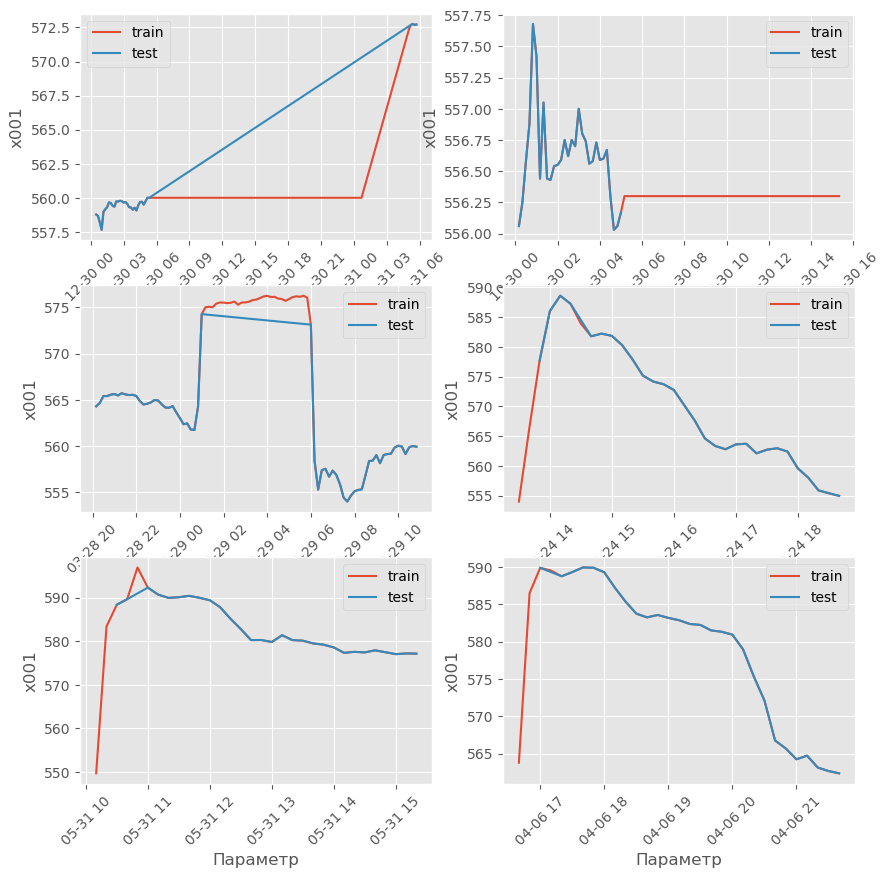

In [45]:
plot_periods(determ_periods, feat = 'х001', head = 6)

In [68]:
train

х001    х002    х005    х006    х007    х008    х009  \
Параметр                                                                      
2021-03-24 13:30:00  554.01  546.45  568.66  553.95  550.21  549.53  564.10   
2021-03-24 13:40:00  566.22  557.23  583.57  567.53  564.84  560.93  580.80   
2021-03-24 13:50:00  577.64  566.55  590.45  576.19  573.11  571.31  590.91   
2021-03-24 14:00:00  586.00  572.80  599.18  585.74  580.65  578.99  596.22   
2021-03-24 14:10:00  588.59  573.98  600.51  590.21  583.39  582.58  594.09   
...                     ...     ...     ...     ...     ...     ...     ...   
2022-03-22 04:20:00  555.43  560.10  557.04  548.81  548.94  580.45  582.69   
2022-03-22 04:30:00  555.73  560.57  557.38  549.22  548.94  580.79  582.94   
2022-03-22 04:40:00  556.68  561.24  558.31  550.17  550.21  581.46  583.78   
2022-03-22 04:50:00  557.01  561.60  558.69  550.39  550.55  582.10  584.34   
2022-03-22 05:00:00  556.92  561.63  558.43  550.30  550.45  582.01  584.46   

                       х010    х011    х012  ...    х040    х041    х042  \
Параметр                                     ...                           
2021-03-24 13:30:00  564.59  555.75  553.00  ...  534.33  531.89  533.32   
2021-03-24 13:40:00  580.53  570.74  563.59  ...  549.94  547.08  547.60   
2021-03-24 13:50:00  589.67  579.19  569.13  ...  560.46  556.89  555.97   
2021-03-24 14:00:00  597.53  585.06  574.26  ...  569.11  565.92  564.06   
2021-03-24 14:10:00  594.99  586.70  571.53  ...  573.98  569.60  567.60   
...                     ...     ...     ...  ...     ...     ...     ...   
2022-03-22 04:20:00  578.78  577.81  579.95  ...  575.21  572.80  566.38   
2022-03-22 04:30:00  579.22  577.80  579.90  ...  575.23  572.74  566.63   
2022-03-22 04:40:00  580.09  578.74  580.90  ...  576.18  574.24  567.80   
2022-03-22 04:50:00  580.38  579.36  580.90  ...  576.67  574.47  567.83   
2022-03-22 05:00:00  580.55  579.20  580.97  ...  577.10  574.29  568.13   

                       х043    х044    х045    х046    х047    х048  sum_feats  
Параметр                                                                        
2021-03-24 13:30:00  564.66  554.75  539.90  537.91  562.42  566.70   24290.53  
2021-03-24 13:40:00  578.51  572.07  553.96  550.94  571.90  578.61   24905.28  
2021-03-24 13:50:00  585.74  581.30  561.09  560.34  577.21  577.46   25263.97  
2021-03-24 14:00:00  589.19  591.20  569.13  568.94  581.37  585.81   25600.38  
2021-03-24 14:10:00  584.83  595.38  572.04  571.79  583.09  588.49   25681.99  
...                     ...     ...     ...     ...     ...     ...        ...  
2022-03-22 04:20:00  556.54  548.89  548.70  559.06  554.61  554.63   24867.08  
2022-03-22 04:30:00  556.50  548.96  548.78  559.15  554.48  554.70   24873.09  
2022-03-22 04:40:00  557.73  550.05  549.69  560.07  555.28  555.60   24915.69  
2022-03-22 04:50:00  558.11  550.28  550.63  560.60  555.85  556.77   24934.22  
2022-03-22 05:00:00  558.23  550.56  550.33  560.54  555.75  555.73   24932.04  

[37339 rows x 45 columns]

In [70]:
train.loc['2022-03-22 04:20:00']

х001           555.43
х002           560.10
х005           557.04
х006           548.81
х007           548.94
х008           580.45
х009           582.69
х010           578.78
х011           577.81
х012           579.95
х013           578.45
х014           576.95
х015           570.50
х016           574.63
х017           572.58
х018           566.83
х019           556.43
х020           548.12
х021           548.45
х022           559.23
х023           554.53
х024           555.07
х025           556.25
х026           560.36
х029           557.20
х030           548.58
х031           550.00
х032           580.95
х033           582.83
х034           578.79
х035           577.11
х036           580.00
х037           578.89
х038           577.12
х039           570.41
х040           575.21
х041           572.80
х042           566.38
х043           556.54
х044           548.89
х045           548.70
х046           559.06
х047           554.61
х048           554.63
sum_feats    24867.08
Name: 2022

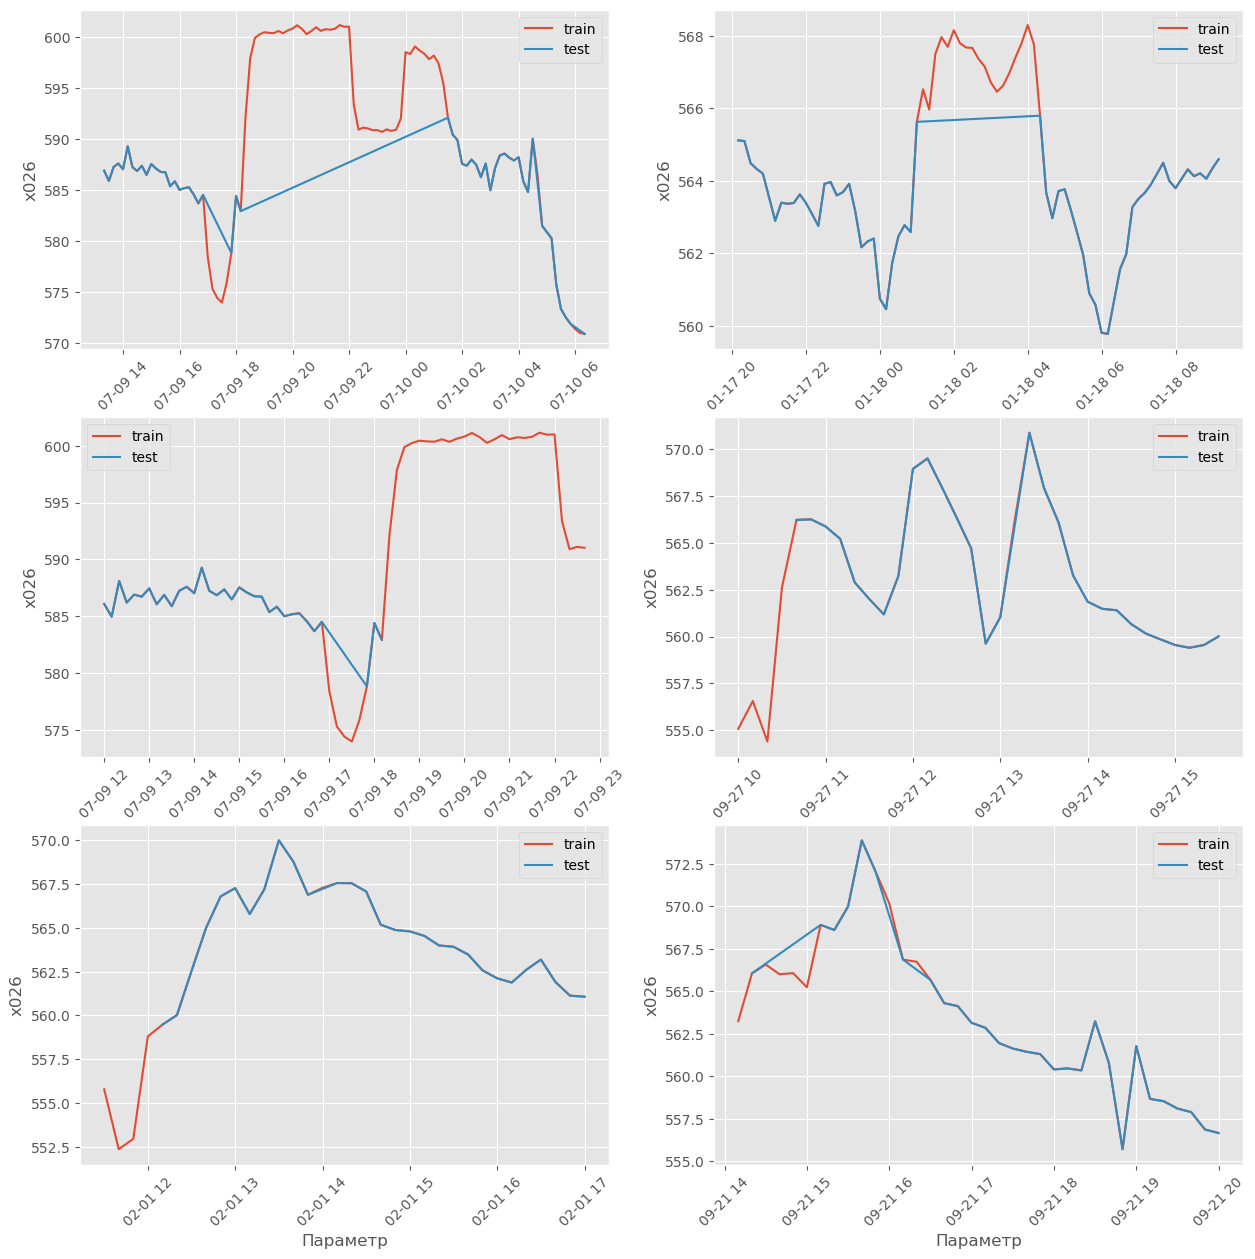

In [72]:
plot_periods(not_determ_periods, feat = 'х026', head = 6)

In [78]:
not_determ_periods

begin                 end  duration end_detected  \
0   2021-07-09 18:20:00 2021-07-10 01:20:00     420.0          NaT   
1   2022-01-18 01:10:00 2022-01-18 04:10:00     180.0          NaT   
2   2021-07-09 17:00:00 2021-07-09 17:40:00      40.0          NaT   
3   2021-09-27 10:00:00 2021-09-27 10:30:00      30.0          NaT   
4   2022-02-01 11:30:00 2022-02-01 12:00:00      30.0          NaT   
..                  ...                 ...       ...          ...   
202 2021-07-18 01:40:00 2021-07-18 01:40:00       0.0          NaT   
203 2021-07-18 04:20:00 2021-07-18 04:20:00       0.0          NaT   
204 2021-07-18 12:40:00 2021-07-18 12:40:00       0.0          NaT   
205 2022-03-16 09:30:00 2022-03-16 09:30:00       0.0          NaT   
206 2022-03-16 13:10:00                 NaT       NaN          NaT   

     duration_detected         begin_broad           end_broad  
0                  NaN 2021-07-09 13:20:00 2021-07-10 06:20:00  
1                  NaN 2022-01-17 20:10:00 2022-01-18 09:10:00  
2                  NaN 2021-07-09 12:00:00 2021-07-09 22:40:00  
3                  NaN 2021-09-27 05:00:00 2021-09-27 15:30:00  
4                  NaN 2022-02-01 06:30:00 2022-02-01 17:00:00  
..                 ...                 ...                 ...  
202                NaN 2021-07-17 20:40:00 2021-07-18 06:40:00  
203                NaN 2021-07-17 23:20:00 2021-07-18 09:20:00  
204                NaN 2021-07-18 07:40:00 2021-07-18 17:40:00  
205                NaN 2022-03-16 04:30:00 2022-03-16 14:30:00  
206                NaN 2022-03-16 08:10:00                 NaT  

[207 rows x 7 columns]

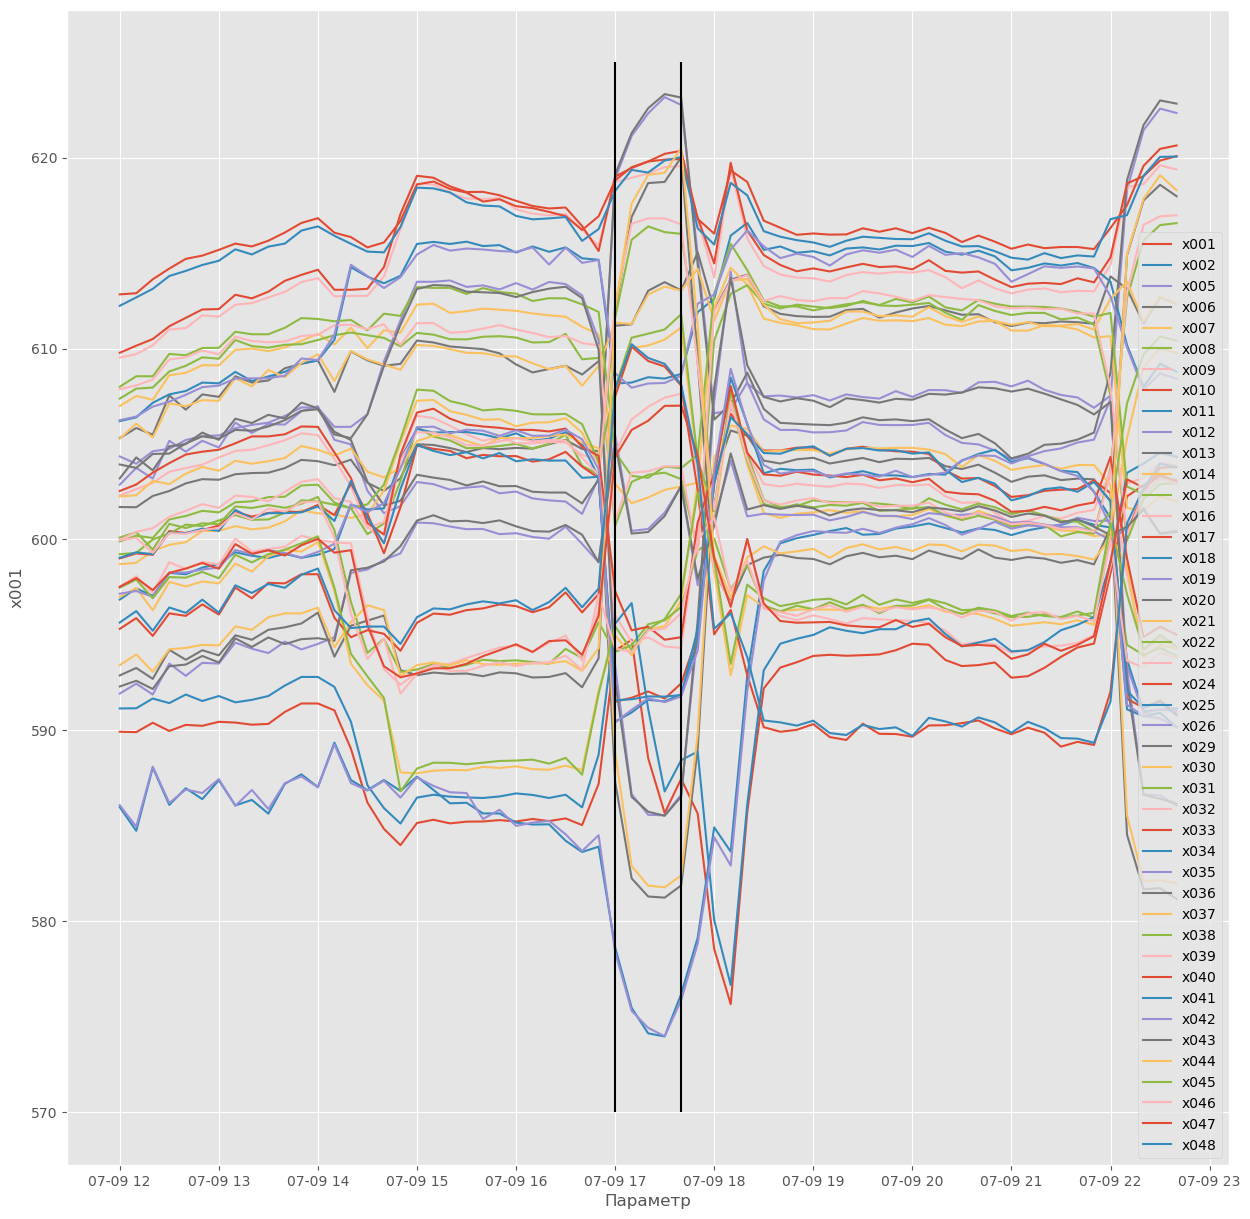

In [138]:
plt.figure(figsize=(15, 15))
plt.style.use('ggplot')
period = 2
for feat in [col for col in train.columns if col not in 'sum_feats']:
    sns.lineplot(data=train.loc[not_determ_periods.loc[period]['begin_broad']:not_determ_periods.loc[period]['end_broad']], 
                 y=feat, 
                 x=train.loc[not_determ_periods.loc[period]['begin_broad']:not_determ_periods.loc[period]['end_broad']].index,
                 label=feat)
plt.vlines(not_determ_periods.loc[period]['begin'],570, 625, colors='black')
plt.vlines(not_determ_periods.loc[period]['end'],570, 625, colors='black')
plt.show()

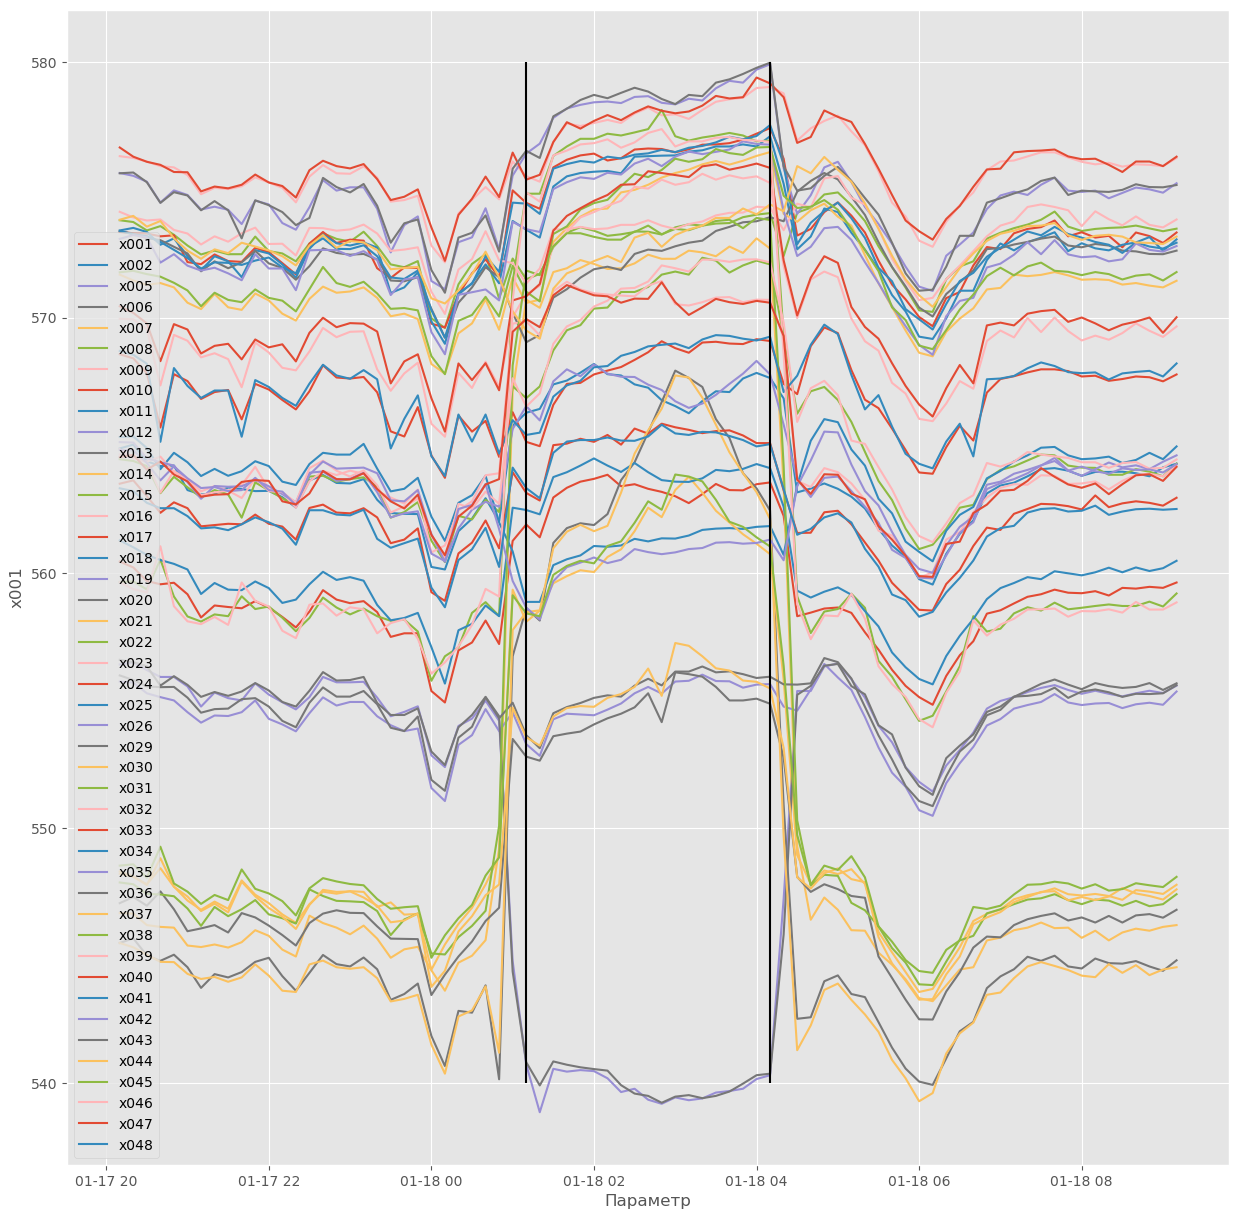

In [93]:
plt.figure(figsize=(15, 15))

for feat in [col for col in train.columns if col not in 'sum_feats']:
    sns.lineplot(data=train.loc[not_determ_periods.loc[1]['begin_broad']:not_determ_periods.loc[1]['end_broad']], 
                 y=feat, 
                 x=train.loc[not_determ_periods.loc[1]['begin_broad']:not_determ_periods.loc[1]['end_broad']].index,
                 label=feat)
plt.vlines(not_determ_periods.loc[1]['begin'],540, 580, colors='black')
plt.vlines(not_determ_periods.loc[1]['end'],540, 580, colors='black')
plt.show()

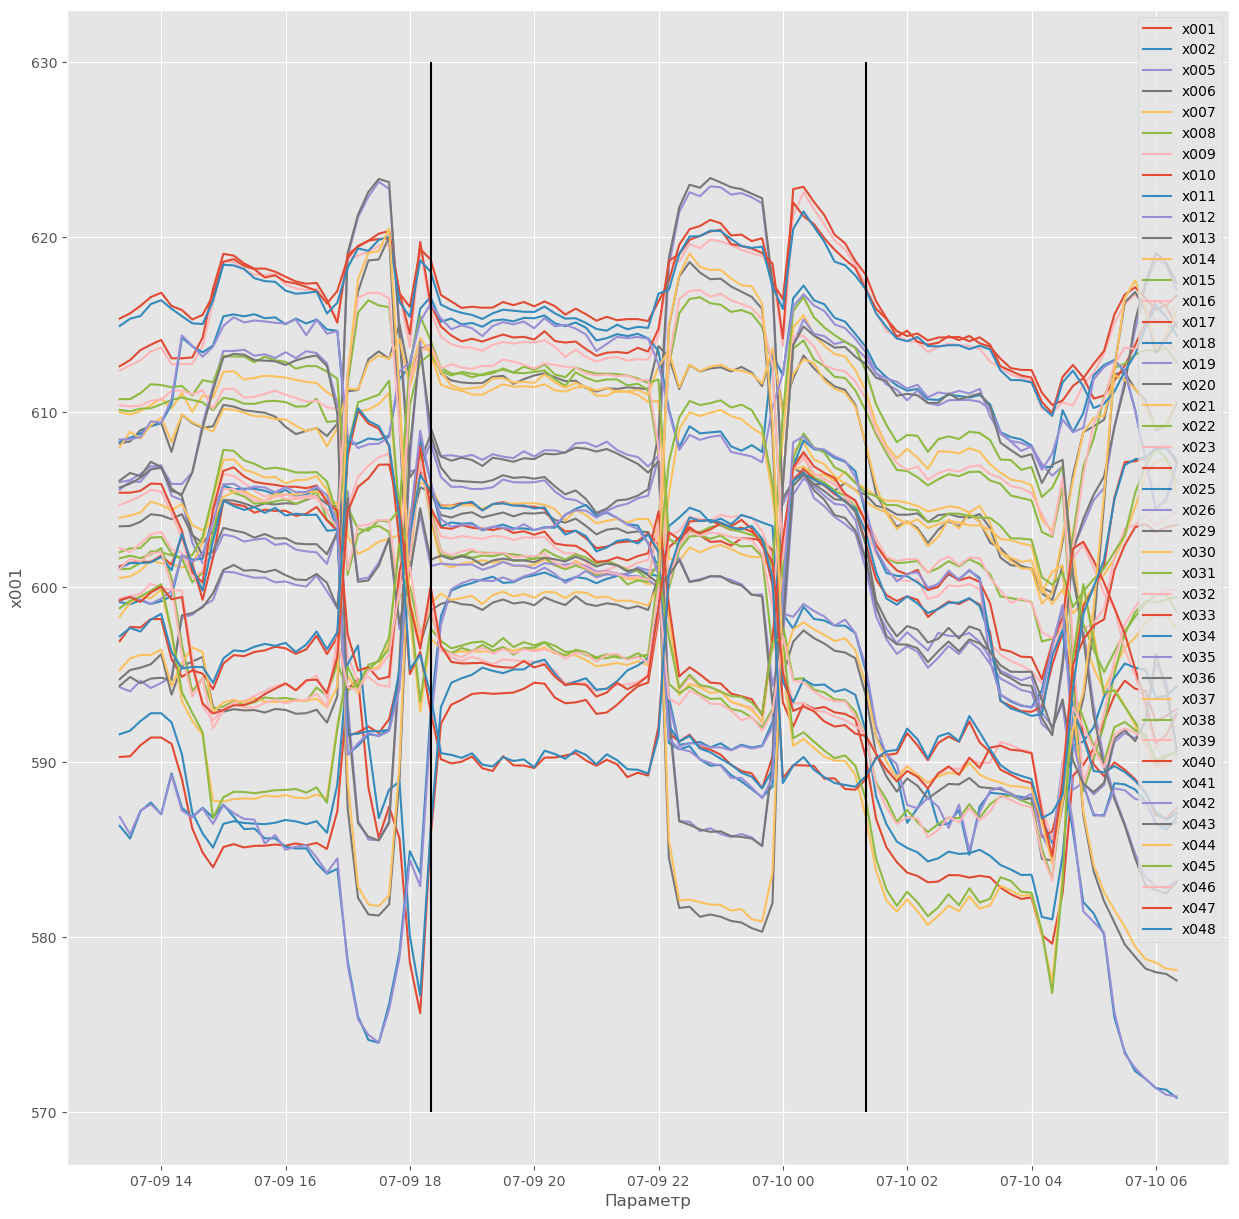

In [88]:
plt.figure(figsize=(15, 15))

for feat in [col for col in train.columns if col not in 'sum_feats']:
    sns.lineplot(data=train.loc[not_determ_periods.loc[0]['begin_broad']:not_determ_periods.loc[0]['end_broad']], 
                 y=feat, 
                 x=train.loc[not_determ_periods.loc[0]['begin_broad']:not_determ_periods.loc[0]['end_broad']].index,
                 label=feat)
plt.vlines(not_determ_periods.loc[0]['begin'],570, 630, colors='black')
plt.vlines(not_determ_periods.loc[0]['end'],570, 630, colors='black')
plt.show()

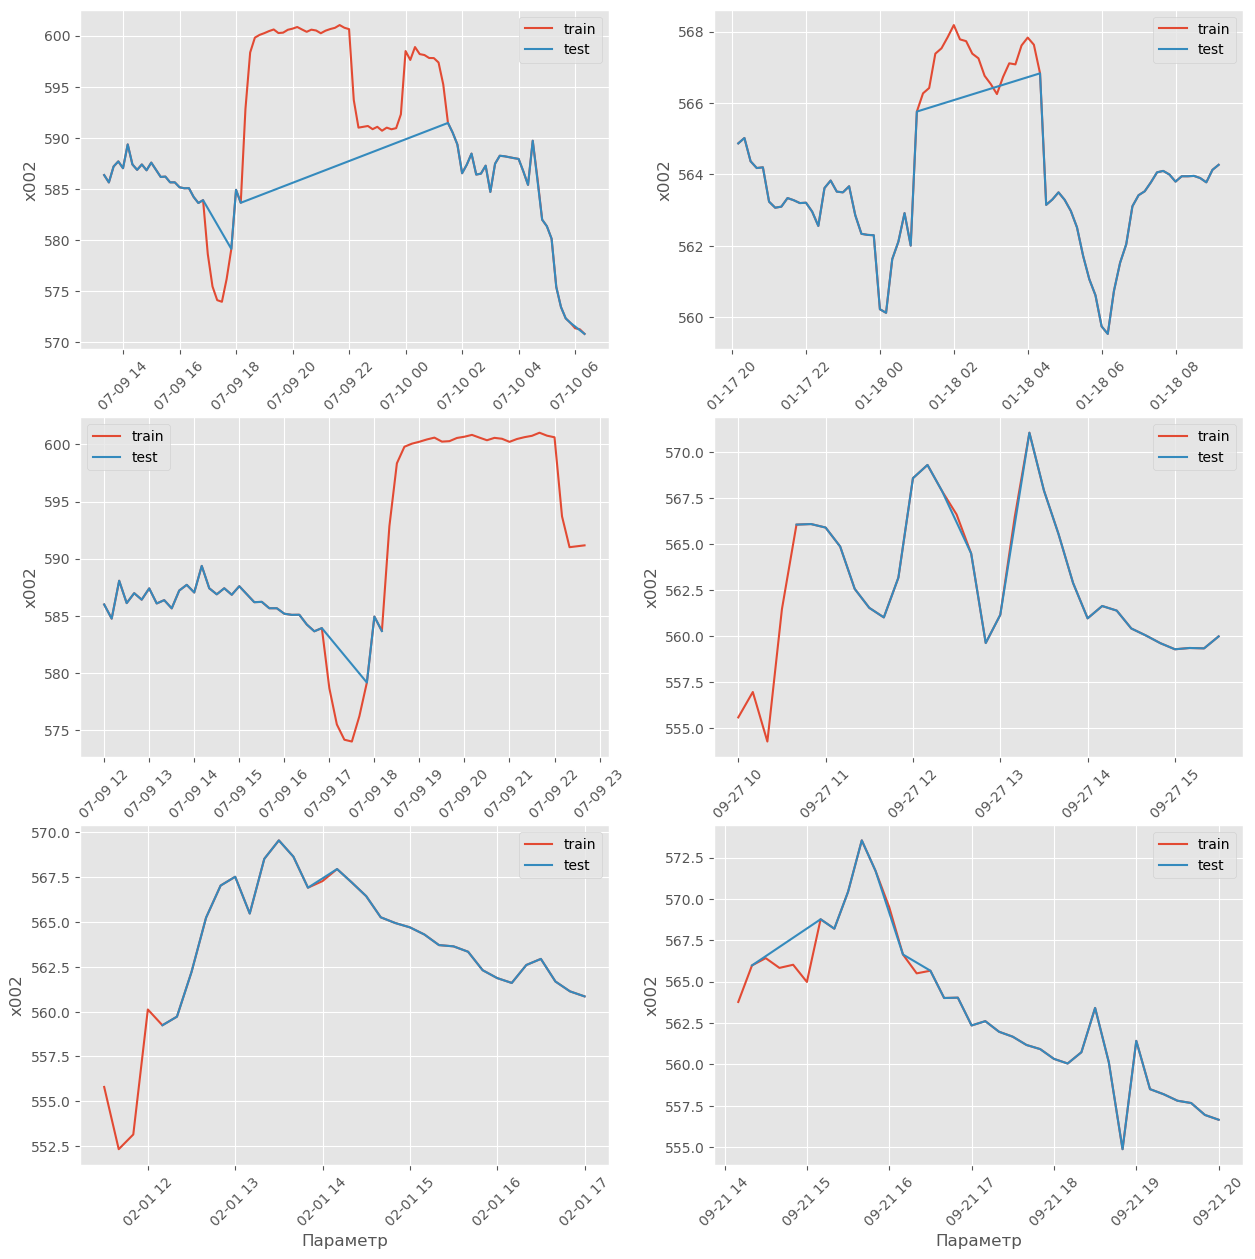

In [71]:
plot_periods(not_determ_periods, feat = 'х002', head = 6)

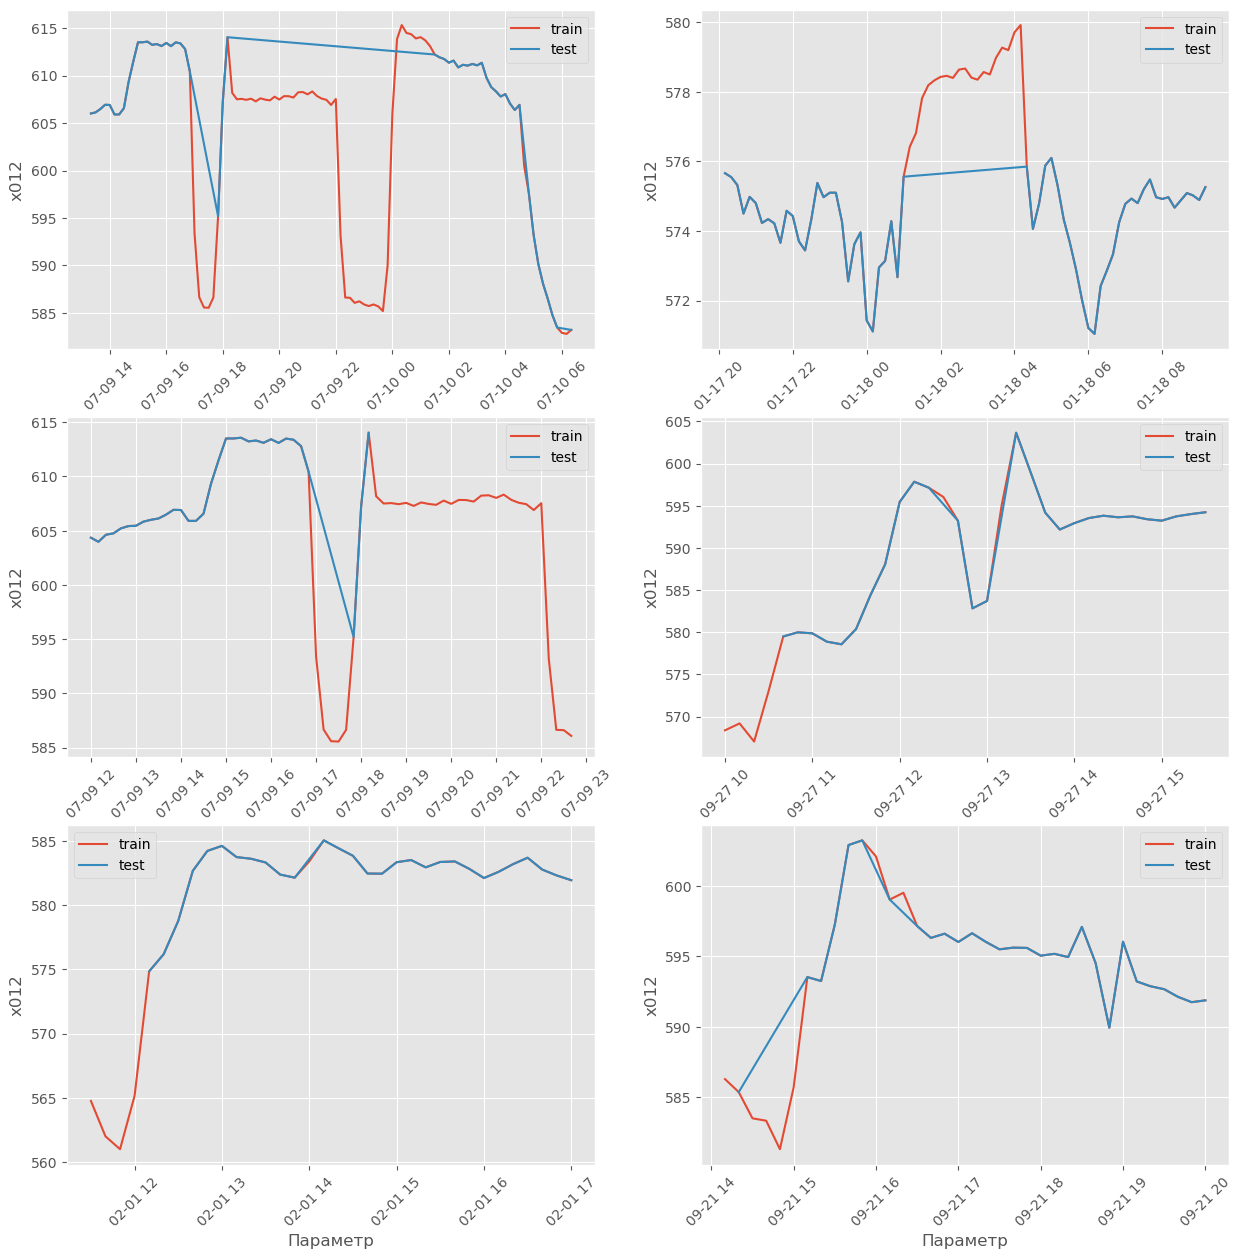

In [66]:
plot_periods(not_determ_periods, feat = 'х012', head = 6)

# lgb

In [19]:
import lightgbm as lgb

In [22]:
from sklearn.model_selection import train_test_split

In [27]:
df['target'] = df['not_outlier'].map(lambda x: 1 if x==0 else 0)

In [33]:
train, val = train_test_split(df[[col for col in df.columns if col!='not_outlier']], test_size=.2, random_state=0)

In [34]:
train

х001    х002    х005    х006    х007    х008    х009  \
Параметр                                                                      
2021-05-20 19:30:00  582.39  581.97  597.08  603.75  606.63  605.82  612.71   
2021-12-03 01:00:00  551.57  556.99  554.99  548.27  547.92  579.90  583.23   
2021-10-20 11:00:00  562.60  566.06  563.46  555.39  554.20  584.85  586.43   
2021-09-27 23:10:00  552.84  554.06  564.51  557.73  554.93  586.38  588.54   
2022-01-10 02:20:00  558.73  563.76  554.45  541.23  549.33  571.98  574.45   
...                     ...     ...     ...     ...     ...     ...     ...   
2021-11-16 06:20:00  551.81  556.95  555.56  548.44  548.28  579.24  582.03   
2022-02-10 15:20:00  556.65  560.66  554.43  546.93  547.35  576.76  580.42   
2022-01-22 22:10:00  557.21  561.44  553.28  541.46  544.15  570.33  573.09   
2021-11-19 15:20:00  551.63  556.47  555.49  548.57  548.02  579.99  582.05   
2021-05-01 04:50:00  567.09  571.39  576.49  583.32  589.74  588.76  597.36   

                       х010    х011    х012  ...    х040    х041    х042  \
Параметр                                     ...                           
2021-05-20 19:30:00  612.54  609.18  609.51  ...  599.42  599.15  601.08   
2021-12-03 01:00:00  579.57  579.04  580.88  ...  574.81  570.97  564.73   
2021-10-20 11:00:00  582.14  581.50  585.74  ...  578.83  575.64  568.98   
2021-09-27 23:10:00  583.82  585.62  587.47  ...  581.47  574.65  568.73   
2022-01-10 02:20:00  571.07  570.31  573.06  ...  567.79  563.59  560.70   
...                     ...     ...     ...  ...     ...     ...     ...   
2021-11-16 06:20:00  578.33  577.45  580.78  ...  573.93  569.90  563.61   
2022-02-10 15:20:00  577.72  577.85  580.66  ...  574.38  571.17  565.79   
2022-01-22 22:10:00  570.40  570.20  572.38  ...  567.53  565.27  561.48   
2021-11-19 15:20:00  577.52  577.04  581.65  ...  576.47  572.08  565.20   
2021-05-01 04:50:00  595.62  590.74  592.79  ...  581.28  578.89  581.38   

                       х043    х044    х045    х046    х047    х048  target  
Параметр                                                                     
2021-05-20 19:30:00  597.47  589.72  584.21  588.50  591.13  593.32       0  
2021-12-03 01:00:00  554.86  546.22  545.88  556.45  556.80  553.60       0  
2021-10-20 11:00:00  561.20  553.63  552.74  562.29  559.75  563.33       0  
2021-09-27 23:10:00  559.73  552.58  552.34  563.44  565.34  563.72       0  
2022-01-10 02:20:00  553.50  546.36  549.19  558.73  564.45  560.70       0  
...                     ...     ...     ...     ...     ...     ...     ...  
2021-11-16 06:20:00  553.62  544.32  544.09  554.86  554.86  551.24       0  
2022-02-10 15:20:00  557.17  549.03  549.10  560.08  561.66  557.17       0  
2022-01-22 22:10:00  552.12  544.40  545.12  555.53  560.80  557.80       0  
2021-11-19 15:20:00  555.10  545.41  545.17  556.12  554.92  551.15       0  
2021-05-01 04:50:00  582.27  572.30  564.38  566.71  573.09  571.49       0  

[29871 rows x 45 columns]

In [35]:
target="target"
features = [col for col in train.columns if col!=target]

In [41]:
params = {  
    'bagging_fraction': 0.849285747554019,
            'bagging_freq': 5,
            'bagging_seed': 0,
            'boosting_type': 'gbdt',
            'data_random_seed': 0,
            'drop_seed': 0,
            'feature_fraction': 0.8212766928844304,
            'feature_fraction_seed': 0,
            'lambda_l1': 0.8955546599539566,
            'lambda_l2': 1.4423261095989717,
            'learning_rate': 0.03,
            'max_bin': 255,
            'max_depth': 43,
            'metric': 'auc',
            'min_data_in_leaf': 149,
            'min_sum_hessian_in_leaf': 1.804477623298885,
            'num_leaves': 363,
            'objective': 'binary',
            'seed': 0,
            'verbose': 4
            }

lgtrain = lgb.Dataset(train[features],
                      label=train[target], 
                     feature_name=features)
lgval = lgb.Dataset(val[features], label=val[target], feature_name=features)
evals_result = {}
verbose_eval = False


model = lgb.train(params = params, 
                  train_set = lgtrain, 
                  valid_names = ['eval'],
                  valid_sets=[lgval],
                  evals_result = evals_result,
                  num_boost_round=1000,
                 early_stopping_rounds=50,
                 verbose_eval = 4)

[LightGBM] [Info] Number of positive: 432, number of negative: 29439
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000021
[LightGBM] [Debug] init for col-wise cost 0.000046 seconds, init for row-wise cost 0.001974 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11220
[LightGBM] [Info] Number of data points in the train set: 29871, number of used features: 44
[LightGBM] [Debug] Use subset for bagging
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.014462 -> initscore=-4.221650
[LightGBM] [Info] Start training from score -4.221650
[LightGBM] [Debug] Re-bagging, using 25384 data to train
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and depth = 12
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No fu

[LightGBM] [Debug] Re-bagging, using 25293 data to train
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 39 and depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 36 and depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 39 and depth = 14
[68]	eval's auc: 0.941702
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 39 and depth = 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 35 and depth = 13
[LightGBM] [Debug] Re-bagging, using 25358 data to train
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 38 and depth = 16
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 41 and depth = 19
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 39 and depth = 19
[124]	eval's auc: 0.94721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 14
[LightGBM] [Debug] Re-bagging, using 25384 data to train
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 37 and depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 44 and depth = 16
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 37 and depth = 12
[180]	eval's auc: 0.949204
[LightGBM] [Debug] Re-bagging, using 25386 data to train
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 44 and depth = 16
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 42 and depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 43 and depth = 14
[184]	eval's auc: 0.949706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 36 and depth = 13
[LightGBM] [Debug] Re-bagging, using 25343 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 39 and depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 42 and depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 12
[284]	eval's auc: 0.952731
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 34 and depth = 11
[LightGBM] [Debug] Re-bagging, using 25271 data to train
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 41 and depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [55]:
df['predict'] = model.predict(df[features])

In [67]:
from sklearn.metrics import f1_score, classification_report

In [66]:
df['class']=df['predict'].map(round)

In [69]:
print(classification_report(df[target],df['class']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36816
           1       0.99      0.76      0.86       523

    accuracy                           1.00     37339
   macro avg       0.99      0.88      0.93     37339
weighted avg       1.00      1.00      1.00     37339



In [42]:
test_evals = pd.read_excel("./data/Задача 1. Датасет 2. Тестовый неразмеченный.xlsx")
test_val_eval = pd.read_excel("./data/Задача 1. Датасет 2. Тестовый размеченный.xlsx")

In [51]:
test_evals.loc[test_val_eval.index, 'not_outliers'] = 1
test_evals = test_evals.fillna(0)

In [52]:
test_evals['target'] = test_evals['not_outliers'].map(lambda x: 1 if x==0 else 0)

In [73]:
test_evals = test_evals.set_index("Параметр", drop=True)

In [75]:
test_evals.columns = [col for col in df.columns if col not in ['predict', 'class']]

In [77]:
test_evals.columns

Index(['х001', 'х002', 'х005', 'х006', 'х007', 'х008', 'х009', 'х010', 'х011',
       'х012', 'х013', 'х014', 'х015', 'х016', 'х017', 'х018', 'х019', 'х020',
       'х021', 'х022', 'х023', 'х024', 'х025', 'х026', 'х029', 'х030', 'х031',
       'х032', 'х033', 'х034', 'х035', 'х036', 'х037', 'х038', 'х039', 'х040',
       'х041', 'х042', 'х043', 'х044', 'х045', 'х046', 'х047', 'х048',
       'not_outlier', 'target'],
      dtype='object')

In [71]:
df.columns

Index(['х001', 'х002', 'х005', 'х006', 'х007', 'х008', 'х009', 'х010', 'х011',
       'х012', 'х013', 'х014', 'х015', 'х016', 'х017', 'х018', 'х019', 'х020',
       'х021', 'х022', 'х023', 'х024', 'х025', 'х026', 'х029', 'х030', 'х031',
       'х032', 'х033', 'х034', 'х035', 'х036', 'х037', 'х038', 'х039', 'х040',
       'х041', 'х042', 'х043', 'х044', 'х045', 'х046', 'х047', 'х048',
       'not_outlier', 'target', 'predict', 'class'],
      dtype='object')

In [79]:
test_evals['predict']=model.predict(test_evals[features])

In [80]:
test_evals['class']=round(test_evals['predict'])

In [82]:
print(classification_report(test_evals[target],test_evals['class']))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77     41160
           1       0.10      0.98      0.18      1772

    accuracy                           0.64     42932
   macro avg       0.55      0.80      0.48     42932
weighted avg       0.96      0.64      0.74     42932

